# Model Iteration with TPOT

TPOT seems very effective in finding a well-performing pipeline for stress/no-stress classification. In this script, we run TPOT for different datasets. We look at datasets created with FLIRT with the following window sizes and step sizes:

- Window size: 10; step size: 1
- Window size: 10; step size: 5
- Window size: 10; step size: 10
- Window size: 15; step size: 1
- Window size: 15; step size: 5
- Window size: 15; step size: 15
- Window size: 30; step size: 1
- Window size: 30; step size: 5
- Window size: 30; step size: 10

The idea behind this is that it would be better to predict stress more quickly, i.e., based on fewer seconds of data - i.e., shorter window sizes. The step size indicated how many seconds we advance to calculate the next window of features. The idea in trying out different values here is to check if we might overfit when using very small step sizes.

The goal of this script is to get an idea about good pipeline and to get an idea of how long the window size and the step size should be.

# Imports

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from tpot import TPOTClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, roc_auc_score, average_precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

import utils

# Functions

In [17]:
def run_tpot(windowsize, stepsize, X_train, y_train, groups_train, X_test, y_test, groups_test, gens, pop_size, cvs):
    '''
    Takes the prepared data and group indication for training and testing a TPOT pipeline.
    Returns X_train, y_train, groups_train, X_test, y_test, groups_test.
    Prints out info during creation.
    '''

    tpot = TPOTClassifier(generations=gens,
                      population_size=pop_size,
                      scoring='f1',
                      cv=cvs,
                      n_jobs=-1,
                      verbosity=2,
                      random_state=0)

    tpot.fit(X_train, y_train.values.ravel(), groups=groups_train.values.ravel())

    print(f"TPOT score (F1) on test data: {tpot.score(X_test, y_test.values.ravel()):.2f}")

    y_test_predict = tpot.predict(X_test)
    y_test_predict_proba = tpot.predict_proba(X_test)[:,1]

    print('accuracy: '+str(accuracy_score(y_test, y_test_predict)))
    print('precision: '+str(precision_score(y_test, y_test_predict)))
    print('recall: '+str(recall_score(y_test, y_test_predict)))
    print('f1_score: '+str(f1_score(y_test, y_test_predict)))
    print('roc_auc: '+str(roc_auc_score(y_test, y_test_predict)))
    print('Class distribution in test set: \n', y_test['label'].value_counts(normalize=True), '\n')
    print('average_precision: '+str(average_precision_score(y_test, y_test_predict_proba)))

    confusion_matrix(y_test, y_test_predict)

    prd = PrecisionRecallDisplay.from_predictions(y_test, y_test_predict_proba, name='Model')
    _ = prd.ax_.set_title('2-class Precision-Recall curve')
    print('The baseline to beat is the percentage of positive cases:', y_test['label'].value_counts(normalize=True)[1])
    plt.show()

    # store results
    filestring = 'tpot-exportet-wesad-'+str(windowsize)+'-'+str(stepsize)+'-'+str(gens)+'-'+str(pop_size)+'-'+str(cvs)
    tpot.export(filestring+'.py')
    print('Resulting pipeline stored to file: ', filestring)

    print('===============================================\n\n')

In [18]:
def full_run_tpot(windowsize, stepsize, gens, pop_size, cvs):
    '''
    Reads data and runs tpot.
    '''

    X_train, y_train, groups_train, X_test, y_test, groups_test = utils.read_data(windowsize, stepsize)
    run_tpot(windowsize, stepsize, X_train, y_train, groups_train, X_test, y_test, groups_test, gens, pop_size, cvs)

# Run TPOT pipelines

Window Size:  10   Stepsize:  1
train shape:  (22032, 65)
test shape:  (5508, 65)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_skewness', 'bvp_BVP_kurtosis',
       'bvp_BVP_peaks', 'bvp_BVP_n_above_mean', 'bvp_BVP_n_below_mean',
       'bvp_BVP_n_sign_changes', 'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy',
       'bvp_l2_min', 'bvp_l2_n_above_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_n_above_mean',
       'acc_x_n_sign_changes', 'acc_y_mean', 'acc_y_std', 'acc_y_energy',
       'acc_y_skewness', 'acc_y_kurtosis', 'acc_y_peaks', 'acc_y_n_above_mean',
       'acc_y_n_below_mean', 'acc_y_n_sign_changes', 'acc_y_svd_entropy',
       'acc_z_mean', 'acc_z_min', 'acc_z_max', 'acc_z_energy',
       'acc_z_skewness', 'acc_z_kurtosis', 'acc_z_peaks', 'acc_z_n_above_mean',
       'acc_z_n_sign_changes', 'acc_z_svd_entropy', 'acc_l2_sum',
       'acc_l2

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8226016024490136

Generation 2 - Current best internal CV score: 0.8282385337654314

Generation 3 - Current best internal CV score: 0.8282385337654314

Generation 4 - Current best internal CV score: 0.8282385337654314

Generation 5 - Current best internal CV score: 0.8291784694118141

Best pipeline: GaussianNB(MaxAbsScaler(RandomForestClassifier(BernoulliNB(MinMaxScaler(input_matrix), alpha=100.0, fit_prior=False), bootstrap=False, criterion=entropy, max_features=0.05, min_samples_leaf=12, min_samples_split=10, n_estimators=100)))
TPOT score (F1) on test data: 0.80
accuracy: 0.8554829339143064
precision: 0.8012884043607532
recall: 0.8036779324055666
f1_score: 0.8024813895781637
roc_auc: 0.8444877076215476
Class distribution in test set: 
 0    0.634713
1    0.365287
Name: label, dtype: float64 

average_precision: 0.7156916788106843
The baseline to beat is the percentage of positive cases: 0.36528685548293394


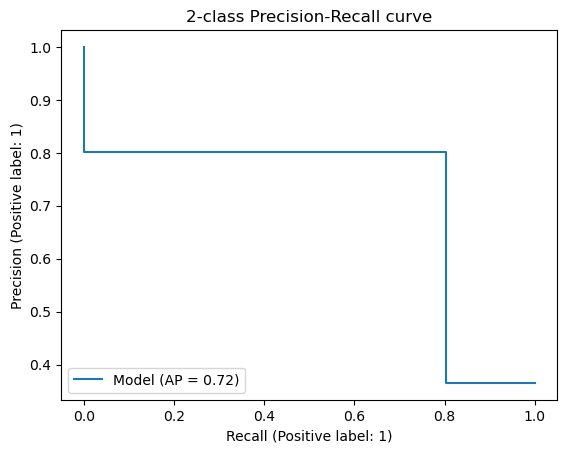

Resulting pipeline stored to file:  tpot-exportet-wesad-10-1-5-20-5


Window Size:  10   Stepsize:  5
train shape:  (4415, 64)
test shape:  (1101, 64)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_skewness', 'bvp_BVP_kurtosis',
       'bvp_BVP_peaks', 'bvp_BVP_n_above_mean', 'bvp_BVP_n_below_mean',
       'bvp_BVP_n_sign_changes', 'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy',
       'bvp_l2_min', 'bvp_l2_n_above_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_n_above_mean',
       'acc_x_n_sign_changes', 'acc_y_mean', 'acc_y_std', 'acc_y_energy',
       'acc_y_skewness', 'acc_y_kurtosis', 'acc_y_peaks', 'acc_y_n_above_mean',
       'acc_y_n_sign_changes', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std',
       'acc_z_min', 'acc_z_max', 'acc_z_energy', 'acc_z_skewness',
       'acc_z_kurtosis', 'acc_z_peaks', 'acc_z_n_above_mean',
       'acc_z_n_sign

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7838098034940352

Generation 2 - Current best internal CV score: 0.7838098034940352

Generation 3 - Current best internal CV score: 0.7838098034940352

Generation 4 - Current best internal CV score: 0.7838098034940352

Generation 5 - Current best internal CV score: 0.79189027008549

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.6500000000000001, verbosity=0)
TPOT score (F1) on test data: 0.58
accuracy: 0.7057220708446866
precision: 0.6048387096774194
recall: 0.5597014925373134
f1_score: 0.5813953488372093
roc_auc: 0.674700531676382
Class distribution in test set: 
 0    0.634877
1    0.365123
Name: label, dtype: float64 

average_precision: 0.7325857130404729
The baseline to beat is the percentage of positive cases: 0.3651226158038147


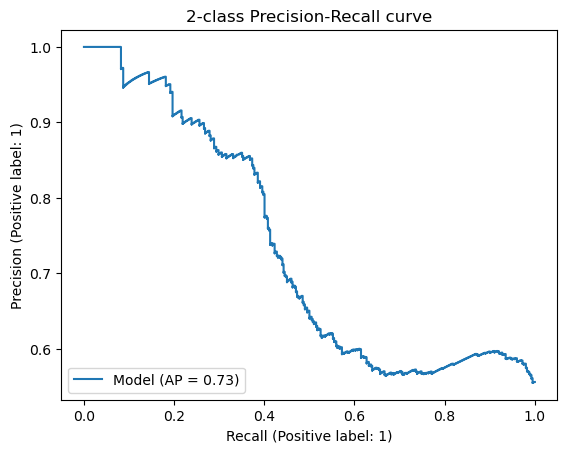

Resulting pipeline stored to file:  tpot-exportet-wesad-10-5-5-20-5


Window Size:  10   Stepsize:  10
train shape:  (2212, 65)
test shape:  (552, 65)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_skewness', 'bvp_BVP_kurtosis',
       'bvp_BVP_peaks', 'bvp_BVP_n_above_mean', 'bvp_BVP_n_below_mean',
       'bvp_BVP_n_sign_changes', 'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy',
       'bvp_l2_min', 'bvp_l2_n_above_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_n_above_mean',
       'acc_x_n_sign_changes', 'acc_y_mean', 'acc_y_std', 'acc_y_energy',
       'acc_y_skewness', 'acc_y_kurtosis', 'acc_y_peaks', 'acc_y_n_above_mean',
       'acc_y_n_sign_changes', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std',
       'acc_z_min', 'acc_z_max', 'acc_z_energy', 'acc_z_skewness',
       'acc_z_kurtosis', 'acc_z_peaks', 'acc_z_n_above_mean',
       'acc_z_n_sign

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7789393745911298

Generation 2 - Current best internal CV score: 0.7789393745911298

Generation 3 - Current best internal CV score: 0.7789393745911298

Generation 4 - Current best internal CV score: 0.7789393745911298

Generation 5 - Current best internal CV score: 0.7789393745911298

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=2, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)
TPOT score (F1) on test data: 0.70
accuracy: 0.8061594202898551
precision: 0.802547770700637
recall: 0.6237623762376238
f1_score: 0.7019498607242342
roc_auc: 0.7675954738330977
Class distribution in test set: 
 0    0.634058
1    0.365942
Name: label, dtype: float64 

average_precision: 0.8177877217671737
The baseline to beat is the percentage of positive cases: 0.36594202898550726


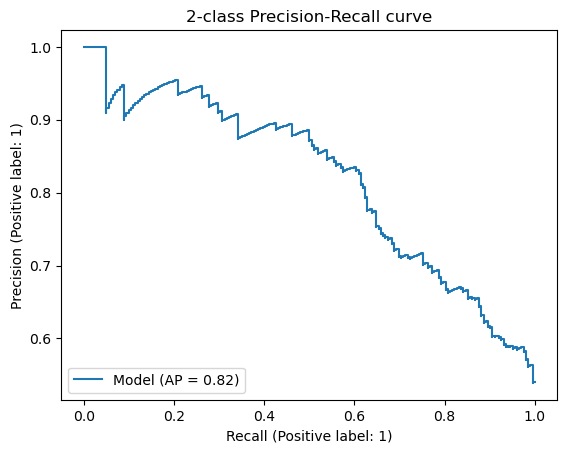

Resulting pipeline stored to file:  tpot-exportet-wesad-10-10-5-20-5


Window Size:  15   Stepsize:  1
train shape:  (22038, 65)
test shape:  (5509, 65)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_skewness', 'bvp_BVP_kurtosis',
       'bvp_BVP_peaks', 'bvp_BVP_n_above_mean', 'bvp_BVP_n_below_mean',
       'bvp_BVP_n_sign_changes', 'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy',
       'bvp_l2_min', 'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean',
       'bvp_l2_n_sign_changes', 'bvp_l2_perm_entropy', 'acc_x_mean',
       'acc_x_std', 'acc_x_energy', 'acc_x_skewness', 'acc_x_kurtosis',
       'acc_x_peaks', 'acc_x_n_above_mean', 'acc_x_n_sign_changes',
       'acc_y_mean', 'acc_y_std', 'acc_y_energy', 'acc_y_skewness',
       'acc_y_kurtosis', 'acc_y_peaks', 'acc_y_n_above_mean',
       'acc_y_n_sign_changes', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_min',
       'acc_z_max', 'acc_z_energy', 'acc_z_skewness', 'acc_z_kurtosis',
       'acc_z_peaks', 'acc_z_n_above_mean', '

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8419372207958322

Generation 2 - Current best internal CV score: 0.8419372207958322

Generation 3 - Current best internal CV score: 0.8419372207958322

Generation 4 - Current best internal CV score: 0.8419372207958322

Generation 5 - Current best internal CV score: 0.842963685759614

Best pipeline: XGBClassifier(MLPClassifier(SelectFwe(BernoulliNB(input_matrix, alpha=100.0, fit_prior=False), alpha=0.035), alpha=0.1, learning_rate_init=0.5), learning_rate=0.1, max_depth=2, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)
TPOT score (F1) on test data: 0.73
accuracy: 0.7642040297694681
precision: 0.624
recall: 0.8916500994035785
f1_score: 0.7341927562922038
roc_auc: 0.7912639973712202
Class distribution in test set: 
 0    0.634779
1    0.365221
Name: label, dtype: float64 

average_precision: 0.7979515398886061
The baseline to beat is the percentage of positive cases: 0.36522054819386457


c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: Use

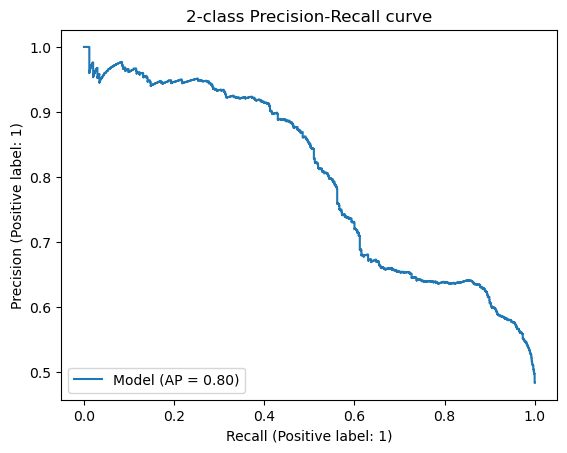

Resulting pipeline stored to file:  tpot-exportet-wesad-15-1-5-20-5


Window Size:  15   Stepsize:  5
train shape:  (4416, 65)
test shape:  (1101, 65)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_skewness', 'bvp_BVP_kurtosis',
       'bvp_BVP_peaks', 'bvp_BVP_n_above_mean', 'bvp_BVP_n_below_mean',
       'bvp_BVP_n_sign_changes', 'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy',
       'bvp_l2_min', 'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean',
       'bvp_l2_n_sign_changes', 'bvp_l2_perm_entropy', 'acc_x_mean',
       'acc_x_std', 'acc_x_energy', 'acc_x_skewness', 'acc_x_kurtosis',
       'acc_x_peaks', 'acc_x_n_above_mean', 'acc_x_n_sign_changes',
       'acc_y_mean', 'acc_y_std', 'acc_y_energy', 'acc_y_skewness',
       'acc_y_kurtosis', 'acc_y_peaks', 'acc_y_n_above_mean',
       'acc_y_n_sign_changes', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std',
       'acc_z_min', 'acc_z_max', 'acc_z_energy', 'acc_z_skewness',
       'acc_z_kurtosis', 'acc_z_peaks', 'acc_z_n_abo

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.808795136705573

Generation 2 - Current best internal CV score: 0.8217094441226956

Generation 3 - Current best internal CV score: 0.8306663113817404

Generation 4 - Current best internal CV score: 0.831191939952204

Generation 5 - Current best internal CV score: 0.831191939952204

Best pipeline: BernoulliNB(XGBClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.05, min_samples_leaf=12, min_samples_split=10, n_estimators=100), learning_rate=0.1, max_depth=7, min_child_weight=13, n_estimators=100, n_jobs=1, subsample=0.3, verbosity=0), alpha=0.001, fit_prior=True)


c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\e

TPOT score (F1) on test data: 0.80
accuracy: 0.8719346049046321
precision: 0.9223300970873787
recall: 0.7089552238805971
f1_score: 0.8016877637130801
roc_auc: 0.8373102299660496
Class distribution in test set: 
 0    0.634877
1    0.365123
Name: label, dtype: float64 

average_precision: 0.7848598358617698
The baseline to beat is the percentage of positive cases: 0.3651226158038147


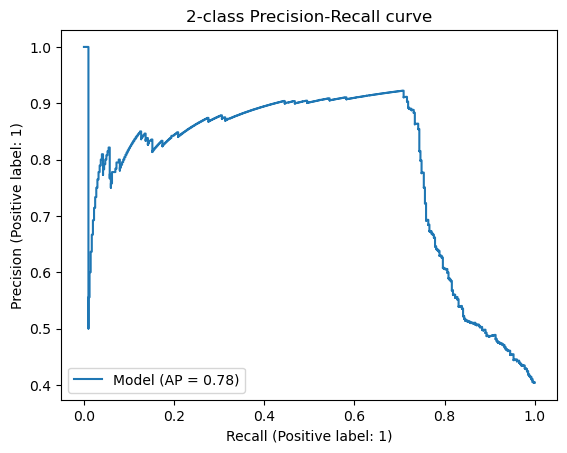

Resulting pipeline stored to file:  tpot-exportet-wesad-15-5-5-20-5


Window Size:  15   Stepsize:  15
train shape:  (1479, 66)
test shape:  (370, 66)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_skewness', 'bvp_BVP_kurtosis',
       'bvp_BVP_peaks', 'bvp_BVP_n_above_mean', 'bvp_BVP_n_below_mean',
       'bvp_BVP_n_sign_changes', 'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy',
       'bvp_l2_min', 'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean',
       'bvp_l2_n_sign_changes', 'bvp_l2_perm_entropy', 'acc_x_mean',
       'acc_x_std', 'acc_x_energy', 'acc_x_skewness', 'acc_x_kurtosis',
       'acc_x_peaks', 'acc_x_n_above_mean', 'acc_x_n_sign_changes',
       'acc_y_mean', 'acc_y_std', 'acc_y_energy', 'acc_y_skewness',
       'acc_y_kurtosis', 'acc_y_peaks', 'acc_y_n_above_mean',
       'acc_y_n_sign_changes', 'acc_y_iqr', 'acc_y_svd_entropy', 'acc_z_mean',
       'acc_z_min', 'acc_z_max', 'acc_z_energy', 'acc_z_skewness',
       'acc_z_kurtosis', 'acc_z_peaks', 'acc_z_n_abo

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8751990948760151

Generation 2 - Current best internal CV score: 0.8751990948760151

Generation 3 - Current best internal CV score: 0.8751990948760151

Generation 4 - Current best internal CV score: 0.8751990948760151

Generation 5 - Current best internal CV score: 0.8818928760202237

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=7, max_features=0.3, min_samples_leaf=8, min_samples_split=5, n_estimators=100, subsample=0.7000000000000001)
TPOT score (F1) on test data: 0.66
accuracy: 0.6243243243243243
precision: 0.4944649446494465
recall: 0.9852941176470589
f1_score: 0.6584766584766585
roc_auc: 0.6999120160884866
Class distribution in test set: 
 0    0.632432
1    0.367568
Name: label, dtype: float64 

average_precision: 0.874962712321029
The baseline to beat is the percentage of positive cases: 0.3675675675675676


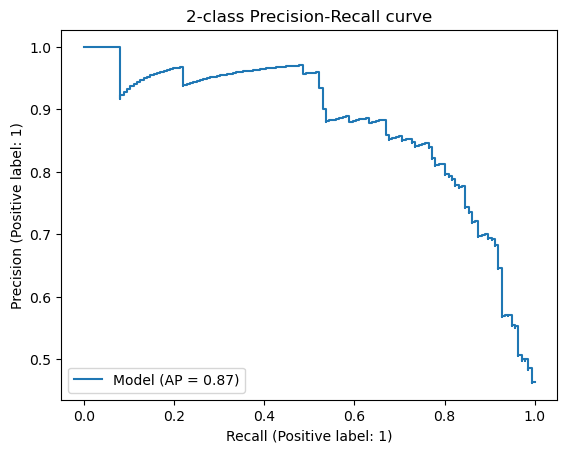

Resulting pipeline stored to file:  tpot-exportet-wesad-15-15-5-20-5


Window Size:  30   Stepsize:  1
train shape:  (22038, 71)
test shape:  (5509, 71)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_sum', 'bvp_BVP_skewness',
       'bvp_BVP_kurtosis', 'bvp_BVP_peaks', 'bvp_BVP_n_above_mean',
       'bvp_BVP_n_below_mean', 'bvp_BVP_n_sign_changes',
       'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy', 'bvp_l2_min',
       'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_lineintegral',
       'acc_x_n_above_mean', 'acc_x_n_sign_changes', 'acc_x_iqr', 'acc_y_mean',
       'acc_y_std', 'acc_y_energy', 'acc_y_skewness', 'acc_y_kurtosis',
       'acc_y_peaks', 'acc_y_n_above_mean', 'acc_y_n_sign_changes',
       'acc_y_iqr', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std',
       'acc_z_min', 'acc_z_max', 'acc_z_energy'

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8918885489548709

Generation 2 - Current best internal CV score: 0.8918885489548709

Generation 3 - Current best internal CV score: 0.8918885489548709

Generation 4 - Current best internal CV score: 0.8973976763037568

Generation 5 - Current best internal CV score: 0.8973976763037568

Best pipeline: ExtraTreesClassifier(MaxAbsScaler(input_matrix), bootstrap=True, criterion=gini, max_features=0.6000000000000001, min_samples_leaf=9, min_samples_split=4, n_estimators=100)
TPOT score (F1) on test data: 0.87
accuracy: 0.9085133418043202
precision: 0.9338319907940161
recall: 0.8066600397614314
f1_score: 0.8655999999999999
roc_auc: 0.8868873547391657
Class distribution in test set: 
 0    0.634779
1    0.365221
Name: label, dtype: float64 

average_precision: 0.9448226824668334
The baseline to beat is the percentage of positive cases: 0.36522054819386457


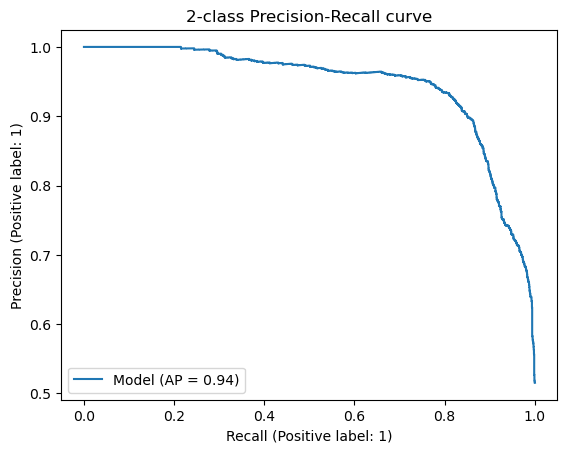

Resulting pipeline stored to file:  tpot-exportet-wesad-30-1-5-20-5


Window Size:  30   Stepsize:  5
train shape:  (4415, 69)
test shape:  (1101, 69)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_sum', 'bvp_BVP_skewness',
       'bvp_BVP_kurtosis', 'bvp_BVP_peaks', 'bvp_BVP_n_above_mean',
       'bvp_BVP_n_below_mean', 'bvp_BVP_n_sign_changes',
       'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy', 'bvp_l2_min',
       'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_lineintegral',
       'acc_x_n_above_mean', 'acc_x_n_sign_changes', 'acc_y_mean', 'acc_y_std',
       'acc_y_max', 'acc_y_energy', 'acc_y_skewness', 'acc_y_kurtosis',
       'acc_y_peaks', 'acc_y_n_above_mean', 'acc_y_n_sign_changes',
       'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std', 'acc_z_min',
       'acc_z_max', 'acc_z_energy', 'acc_z_skewne

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8664751173519674

Generation 2 - Current best internal CV score: 0.8749687152441729

Generation 3 - Current best internal CV score: 0.8749687152441729

Generation 4 - Current best internal CV score: 0.8749687152441729

Generation 5 - Current best internal CV score: 0.8854244608476206

Best pipeline: DecisionTreeClassifier(RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.05, min_samples_leaf=12, min_samples_split=17, n_estimators=100), criterion=gini, max_depth=7, min_samples_leaf=13, min_samples_split=16)
TPOT score (F1) on test data: 0.84
accuracy: 0.8864668483197093
precision: 0.8695652173913043
recall: 0.8060453400503779
f1_score: 0.8366013071895425
roc_auc: 0.8689317609342798
Class distribution in test set: 
 0    0.639419
1    0.360581
Name: label, dtype: float64 

average_precision: 0.7708454127832137
The baseline to beat is the percentage of positive cases: 0.3605812897366031


c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\envs\stress01\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Tools\anaconda3\e

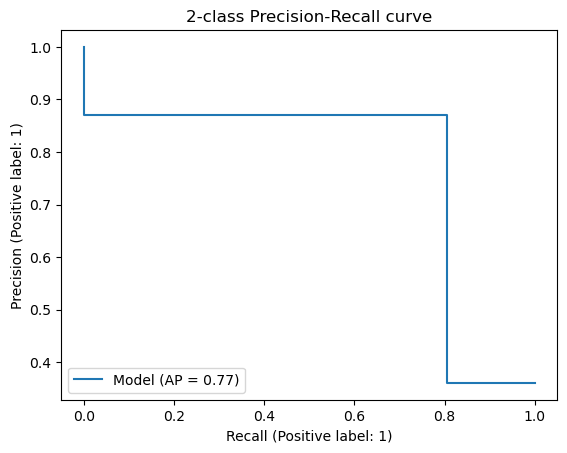

Resulting pipeline stored to file:  tpot-exportet-wesad-30-5-5-20-5


Window Size:  30   Stepsize:  10
train shape:  (2212, 70)
test shape:  (552, 70)
test columns:  Index(['bvp_BVP_mean', 'bvp_BVP_std', 'bvp_BVP_sum', 'bvp_BVP_skewness',
       'bvp_BVP_kurtosis', 'bvp_BVP_peaks', 'bvp_BVP_n_above_mean',
       'bvp_BVP_n_below_mean', 'bvp_BVP_n_sign_changes',
       'bvp_BVP_perm_entropy', 'bvp_BVP_svd_entropy', 'bvp_l2_min',
       'bvp_l2_n_above_mean', 'bvp_l2_n_below_mean', 'bvp_l2_n_sign_changes',
       'bvp_l2_perm_entropy', 'acc_x_mean', 'acc_x_std', 'acc_x_energy',
       'acc_x_skewness', 'acc_x_kurtosis', 'acc_x_peaks', 'acc_x_lineintegral',
       'acc_x_n_above_mean', 'acc_x_n_sign_changes', 'acc_y_mean', 'acc_y_std',
       'acc_y_max', 'acc_y_energy', 'acc_y_skewness', 'acc_y_kurtosis',
       'acc_y_peaks', 'acc_y_n_above_mean', 'acc_y_n_sign_changes',
       'acc_y_iqr', 'acc_y_svd_entropy', 'acc_z_mean', 'acc_z_std',
       'acc_z_min', 'acc_z_max', 'acc_z_energy', 

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8570459466902035

Generation 2 - Current best internal CV score: 0.8633341025273422

Generation 3 - Current best internal CV score: 0.8638339075232591

Generation 4 - Current best internal CV score: 0.8675002068145561

Generation 5 - Current best internal CV score: 0.8700074118172607

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.6500000000000001, min_samples_leaf=5, min_samples_split=7, n_estimators=100)
TPOT score (F1) on test data: 0.77
accuracy: 0.855072463768116
precision: 0.9
recall: 0.675
f1_score: 0.7714285714285714
roc_auc: 0.8161931818181819
Class distribution in test set: 
 0    0.637681
1    0.362319
Name: label, dtype: float64 

average_precision: 0.9041331991047628
The baseline to beat is the percentage of positive cases: 0.36231884057971014


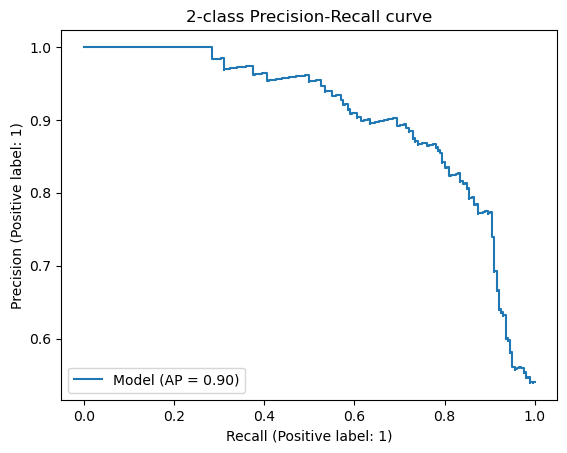

Resulting pipeline stored to file:  tpot-exportet-wesad-30-10-5-20-5


CPU times: total: 1min 31s
Wall time: 1h 48min 10s


In [19]:
%%time
full_run_tpot(10, 1, 5, 20, 5)
full_run_tpot(10, 5, 5, 20, 5)
full_run_tpot(10, 10, 5, 20, 5)

full_run_tpot(15, 1, 5, 20, 5)
full_run_tpot(15, 5, 5, 20, 5)
full_run_tpot(15, 15, 5, 20, 5)

full_run_tpot(30, 1, 5, 20, 5)
full_run_tpot(30, 5, 5, 20, 5)
full_run_tpot(30, 10, 5, 20, 5)

# Interpretation

The results are:

Window-size; step size; F1 score
* 10-1: 0.8
* 10-5: 0.58
* 10-10: 0.7
* 15-1: 0.73
* 15-5: 0.8
* 15-15: 0.66
* 30-1: 0.87
* 30-5: 0.84
* 30-10: 0.77

Overall, we notice that the F1 score generally improves when going from 10 to 15 to 30 seconds window size. We do not observe overfitting with step size 1 second, rather, we see the best performance when using step size 1. In our initial TPOT pipeline test, we saw an F1 score of 0.88 for window size 60 and step size 10. Now, we have an F1 score of 0.87 for window size 30. My conclusion from these results here are that we continue working with step size 1 and with window size 30, because at this window size, the trade-off between F1 score and amount of data in seconds we need to make a prediction seem best.

Dicision: Step size 1, window size 30.

In the next step, we will conduct a hyperparameter search when building a ExtraTreesClassifier pipeline.